In [11]:
import matplotlib.pyplot as plt
import subprocess
import re
result = subprocess.run(['openssl', 'speed', 'rsa'], capture_output=True, text=True)

In [12]:
output = result.stdout
data = {}

In [13]:
output

'OpenSSL 1.1.1t  7 Feb 2023\nbuilt on: Mon Feb 13 23:32:37 2023 UTC\noptions:bn(64,64) rc4(16x,int) des(long) aes(partial) idea(int) blowfish(ptr) \ncompiler: cl.exe /Zi /Fdossl_static.pdb /Gs0 /GF /Gy /MD /W3 /wd4090 /nologo /O2 -DL_ENDIAN -DOPENSSL_PIC -DOPENSSL_CPUID_OBJ -DOPENSSL_IA32_SSE2 -DOPENSSL_BN_ASM_MONT -DOPENSSL_BN_ASM_MONT5 -DOPENSSL_BN_ASM_GF2m -DSHA1_ASM -DSHA256_ASM -DSHA512_ASM -DKECCAK1600_ASM -DRC4_ASM -DMD5_ASM -DAESNI_ASM -DVPAES_ASM -DGHASH_ASM -DECP_NISTZ256_ASM -DX25519_ASM -DPOLY1305_ASM\n                  sign    verify    sign/s verify/s\nrsa  512 bits 0.000030s 0.000003s  33605.8 393171.7\nrsa 1024 bits 0.000080s 0.000005s  12456.0 188714.5\nrsa 2048 bits 0.000497s 0.000016s   2013.1  62147.2\nrsa 3072 bits 0.001530s 0.000034s    653.7  29789.9\nrsa 4096 bits 0.003509s 0.000058s    285.0  17316.0\nrsa 7680 bits 0.031448s 0.000195s     31.8   5126.4\nrsa 15360 bits 0.171606s 0.000763s      5.8   1310.5\n'

In [14]:
regex = re.compile(r'rsa\s+(\d+)\s+bits\s+[\d.]+s\s+[\d.]+s\s+([\d.]+)\s+([\d.]+)')

In [15]:
for match in regex.finditer(output):
    key_size = match.group(1)  # RSA key size (e.g., 512, 1024, 2048, etc.)
    sign_per_sec = float(match.group(2))  # Signatures per second
    verify_per_sec = float(match.group(3))  # Verifications per second

In [16]:
data[key_size] = (sign_per_sec, verify_per_sec)  # Store as a tuple (sign, verify)

In [17]:
def plot(data, title, xlabel, ylabel):
    for key_size, throughput in data.items():
        plt.plot(throughput, label=f'{key_size}-bit')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{title}.png")

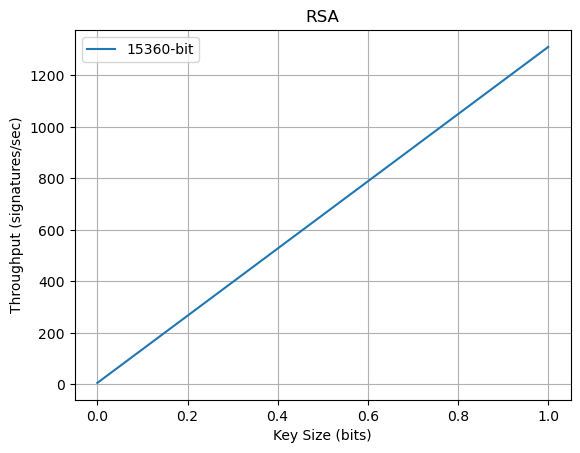

In [18]:
plot(data, "RSA", "Key Size (bits)", "Throughput (signatures/sec)")